In [217]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [218]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [219]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [220]:
train.shape

(891, 12)

In [221]:
test.shape

(418, 11)

In [222]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [223]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [224]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [225]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [226]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

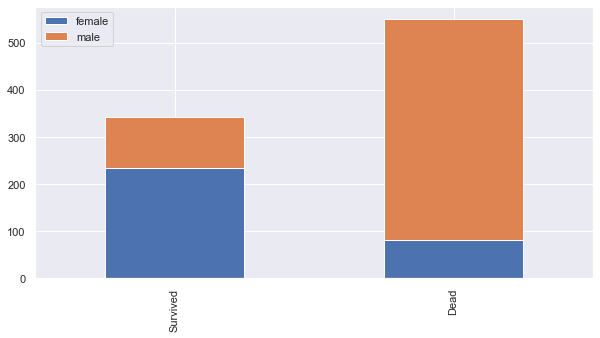

In [227]:
bar_chart('Sex')

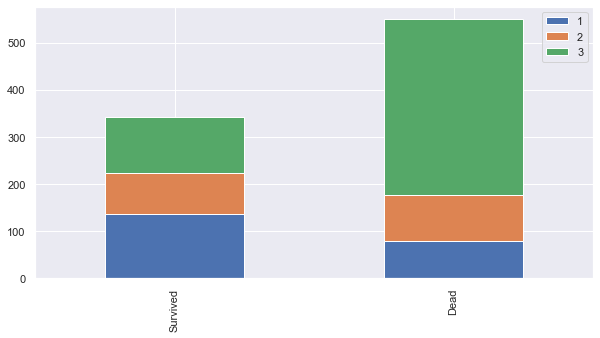

In [228]:
bar_chart('Pclass')

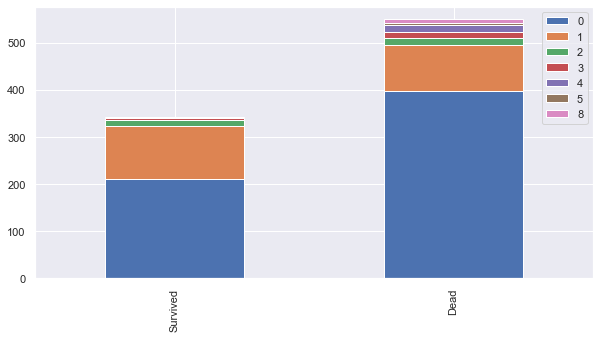

In [229]:
bar_chart('SibSp')

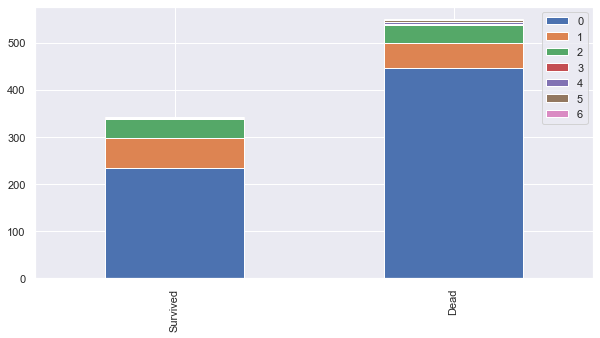

In [230]:
bar_chart('Parch')

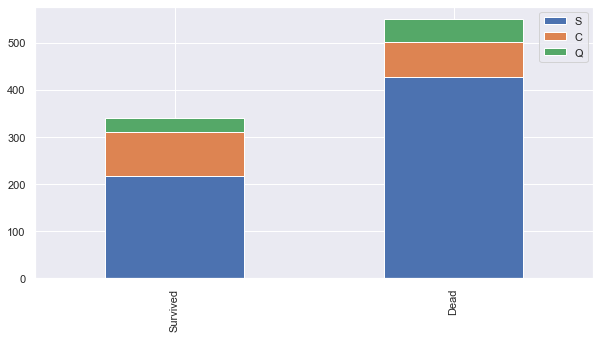

In [231]:
bar_chart('Embarked')

# Feature Engineering

## Name

In [232]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand = False)

In [233]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [234]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [235]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

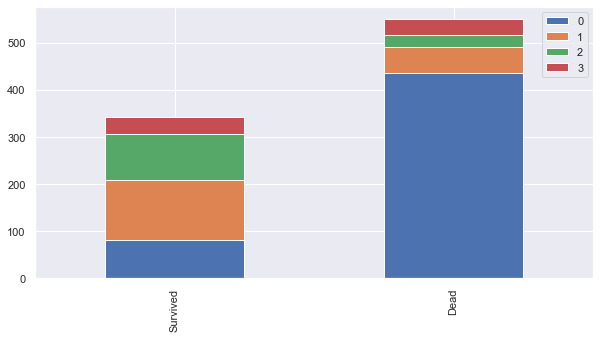

In [236]:
bar_chart('Title')

In [237]:
# delete  unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [238]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [239]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


## Sex

In [240]:
# male : 0, femail : 1
sex_mapping = {"male" : 0, "female": 1}
for dataset in train_test_data:
    dataset["Sex"] = dataset['Sex'].map(sex_mapping)

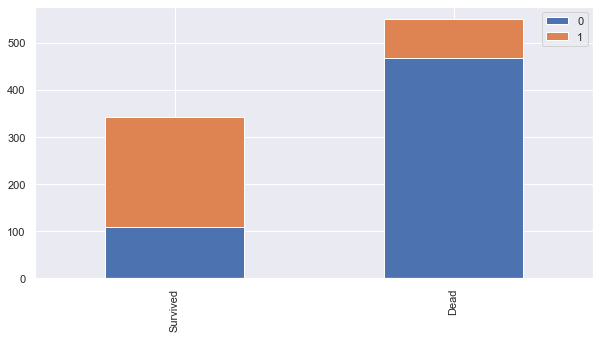

In [241]:
bar_chart('Sex')

## Age

##### Some Age is missing

In [242]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2


In [243]:
train['Age'].fillna(train.groupby("Title")["Age"].transform("median"), inplace= True)
test['Age'].fillna(train.groupby("Title")["Age"].transform("median"), inplace= True)

In [244]:
train.head(30)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

(0.0, 20.0)

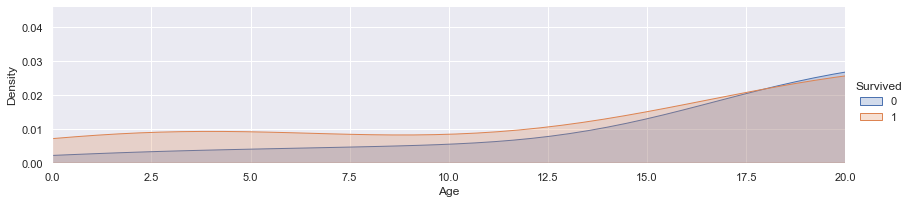

In [245]:
facet = sns.FacetGrid(train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(0,20)

(20.0, 30.0)

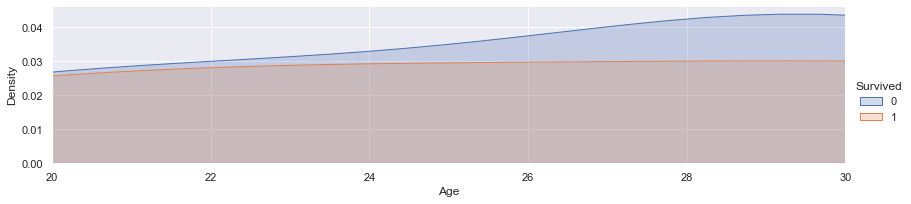

In [246]:
facet = sns.FacetGrid(train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(20,30)

(30.0, 40.0)

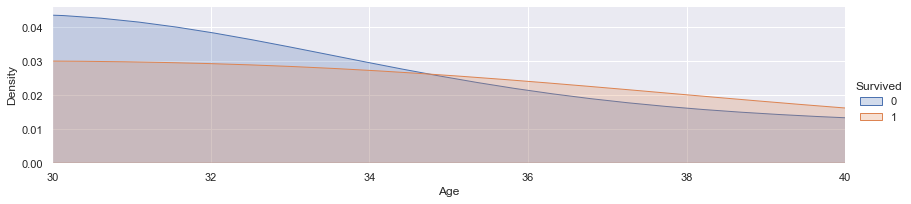

In [247]:
facet = sns.FacetGrid(train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(30,40)

(40.0, 60.0)

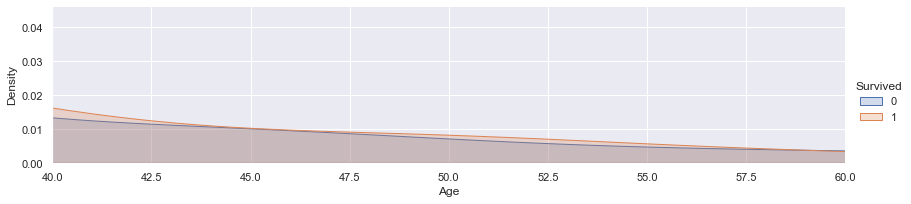

In [248]:
facet = sns.FacetGrid(train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(40,60)

(60.0, 80.0)

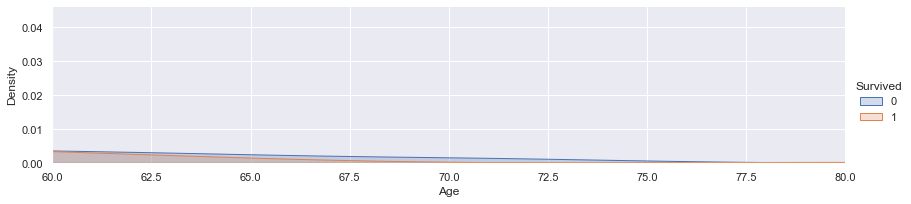

In [249]:
facet = sns.FacetGrid(train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(60)

### Binning

feature vector map:
child : 0
young : 1
adult : 2
mid-age : 3
senior : 4

In [250]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 20, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 60), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 4

ValueError: Must have equal len keys and value when setting with an iterable

## Embarked

<AxesSubplot:>

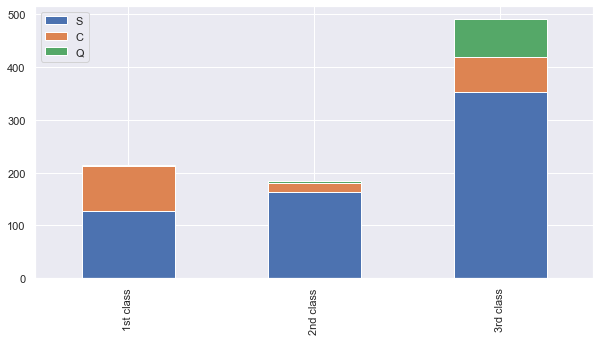

In [115]:
Pclass1 = train[train['Pclass']==1]["Embarked"].value_counts()
Pclass2 = train[train['Pclass']==2]["Embarked"].value_counts()
Pclass3 = train[train['Pclass']==3]["Embarked"].value_counts()
df = pd.DataFrame([Pclass1, Pclass2,Pclass3])
df.index = ["1st class", '2nd class', '3rd class']
df.plot(kind = "bar", stacked =True, figsize = (10,5))

In [116]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')


In [283]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,NaN,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,NaN,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [214]:
embarked_mapping = {"S" : 0, "C" : 1, "Q" : 2}
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map(embarked_mapping)

## Fare

In [120]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace=True)
train["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"),inplace=True)

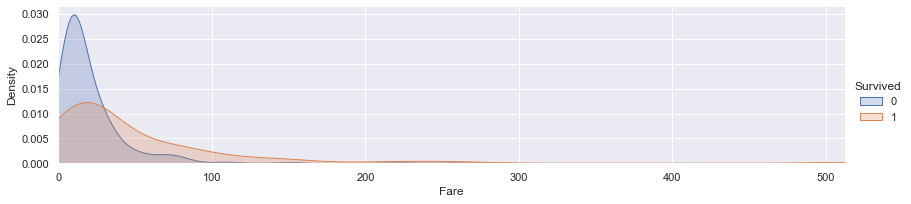

In [251]:
facet = sns.FacetGrid(train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, "Fare", shade = True)
facet.set(xlim=(0, train["Fare"].max()))
facet.add_legend()
plt.show()

## Cabin

In [286]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].fillna(0)


In [288]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [289]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [290]:
train_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title
0,3,0,22.0,7.2500,0,0
1,1,1,38.0,71.2833,1,2
2,3,1,26.0,7.9250,0,1
3,1,1,35.0,53.1000,0,2
4,3,0,35.0,8.0500,0,0


In [310]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [311]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 7), (891,))

In [312]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [313]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     0 non-null      float64
 6   Embarked  889 non-null    object 
 7   Title     891 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 55.8+ KB


In [314]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold =  KFold(n_splits = 10, shuffle= True, random_state = 0)


In [315]:
#Knn
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv =k_fold, n_jobs = 1, scoring = scoring)
print(score)

[nan nan nan nan nan nan nan nan nan nan]


C:\Users\82104\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 363, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\

In [316]:
# KNN score
round(np.mean(score)*100,2)

nan

In [317]:
# Decision Tree
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv =k_fold, n_jobs = 1, scoring = scoring)
print(score)

[nan nan nan nan nan nan nan nan nan nan]


C:\Users\82104\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 157, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\utils\

In [318]:
# decision tree score
round(np.mean(score)*100,2)

nan

In [319]:
# Random Forest
clf = RandomForestClassifier(n_estimators = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv =k_fold, n_jobs = 1, scoring = scoring)
print(score)

[nan nan nan nan nan nan nan nan nan nan]


C:\Users\82104\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 871, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

In [320]:
# Random Forest score
round(np.mean(score)*100,2)

nan

In [321]:
# Naive Bayes
clf =GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv =k_fold, n_jobs = 1, scoring = scoring)
print(score)

[nan nan nan nan nan nan nan nan nan nan]


C:\Users\82104\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 207, in fit
    X, y = self._validate_data(X, y)
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 871, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "C:\Users\8210

In [322]:
# GaussianNB score
round(np.mean(score)*100,2)

nan

In [323]:
# SVM
clf =SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv =k_fold, n_jobs = 1, scoring = scoring)
print(score)

[nan nan nan nan nan nan nan nan nan nan]


C:\Users\82104\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 169, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\82104\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 871, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  Fil

In [324]:
# SVC score
round(np.mean(score)*100,2)

nan

## Testing

In [325]:
clf = RandomForestClassifier(n_estimators = 13)
clf.fit(train_data, target)

ValueError: could not convert string to float: 'S'

In [305]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,1,39.0,0,0,PC 17758,108.9000,NaN,C,3
415,1307,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,0,35.0,0,0,359309,8.0500,NaN,S,0


In [306]:
test_data = test.drop(["PassengerId","Cabin"], axis=1)
test_data

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,3,0,34.5,0,0,330911,7.8292,Q,0
1,3,1,47.0,1,0,363272,7.0000,S,2
2,2,0,62.0,0,0,240276,9.6875,Q,0
3,3,0,27.0,0,0,315154,8.6625,S,0
4,3,1,22.0,1,1,3101298,12.2875,S,2
...,...,...,...,...,...,...,...,...,...
413,3,0,30.0,0,0,A.5. 3236,8.0500,S,0
414,1,1,39.0,0,0,PC 17758,108.9000,C,3
415,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,3,0,35.0,0,0,359309,8.0500,S,0


In [307]:
prediction = clf.predict(test_data)

ValueError: could not convert string to float: 'A/4 48871'

In [308]:
submission = pd.DataFrame( {
    "PassengerId" : test["PassengerId"],
    "Survived" : prediction
})
submission.to_csv('submission.csv', index= False)

NameError: name 'prediction' is not defined

In [309]:
submission = pd.read_csv('submission.csv')
submission.head()

FileNotFoundError: [Errno 2] No such file or directory: 'submission.csv'